## Answer/Execute the following statements:

### RFM and K-Means
1. Load the `new_df` from yesterday.
2. Make a new df `history_df` where you place the RFM per CustomerID.
3. For easier interpretation, convert the RFM values to log scale. (Hint: Use `.apply(math.log)`.
3. Plot the 3 of them vs Amount.
4. Create a 3D plot of RFM by running this (make sure to name your variables accordingly):

In [1]:
# 1 Load the new_df from yesterday.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import math
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import scipy

df=pd.read_csv('H_new_df.csv')

In [2]:
df.head()

Unnamed: 0  InvoiceNo StockCode                          Description  \
0           0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1           1     536365     71053                  WHITE METAL LANTERN   
2           2     536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3           3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4           4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity          InvoiceDate  UnitPrice  CustomerID         Country  \
0         6  2010-12-01 08:26:00       2.55       17850  United Kingdom   
1         6  2010-12-01 08:26:00       3.39       17850  United Kingdom   
2         8  2010-12-01 08:26:00       2.75       17850  United Kingdom   
3         6  2010-12-01 08:26:00       3.39       17850  United Kingdom   
4         6  2010-12-01 08:26:00       3.39       17850  United Kingdom   

   amount  
0   15.30  
1   20.34  
2   22.00  
3   20.34  
4   20.34

In [3]:
# 2 Make a new df history_df where you place the RFM per CustomerID.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = max(df['InvoiceDate']) + timedelta(days=1)


In [4]:
reference_date-df['InvoiceDate']
df['LastPurchase']=reference_date-df['InvoiceDate']
df

Unnamed: 0  InvoiceNo StockCode                          Description  \
0                0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1                1     536365     71053                  WHITE METAL LANTERN   
2                2     536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3                3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4                4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...            ...        ...       ...                                  ...   
397879      397879     581587     22613          PACK OF 20 SPACEBOY NAPKINS   
397880      397880     581587     22899         CHILDREN'S APRON DOLLY GIRL    
397881      397881     581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
397882      397882     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
397883      397883     581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity         InvoiceDate  UnitPrice  CustomerID         Country  \
0              6 2010-12-01 08:26:00       2.55       17850  United Kingdom   
1              6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
2              8 2010-12-01 08:26:00       2.75       17850  United Kingdom   
3              6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
4              6 2010-12-01 08:26:00       3.39       17850  United Kingdom   
...          ...                 ...        ...         ...             ...   
397879        12 2011-12-09 12:50:00       0.85       12680          France   
397880         6 2011-12-09 12:50:00       2.10       12680          France   
397881         4 2011-12-09 12:50:00       4.15       12680          France   
397882         4 2011-12-09 12:50:00       4.15       12680          France   
397883         3 2011-12-09 12:50:00       4.95       12680          France   

        amount      LastPurchase  
0        15.30 374 days 04:24:00  
1        20.34 374 days 04:24:00  
2        22.00 374 days 04:24:00  
3        20.34 374 days 04:24:00  
4        20.34 374 days 04:24:00  
...        ...               ...  
397879   10.20   1 days 00:00:00  
397880   12.60   1 days 00:00:00  
397881   16.60   1 days 00:00:00  
397882   16.60   1 days 00:00:00  
397883   14.85   1 days 00:00:00  

[397884 rows x 11 columns]

In [5]:
df['LastPurchase']

0        374 days 04:24:00
1        374 days 04:24:00
2        374 days 04:24:00
3        374 days 04:24:00
4        374 days 04:24:00
                ...       
397879     1 days 00:00:00
397880     1 days 00:00:00
397881     1 days 00:00:00
397882     1 days 00:00:00
397883     1 days 00:00:00
Name: LastPurchase, Length: 397884, dtype: timedelta64[ns]

In [6]:
df_Recency=df.groupby('CustomerID')['LastPurchase'].min()

In [7]:
df['total_price'] = df['Quantity'] * df['UnitPrice']

In [8]:
df_RFM=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,
                                              'InvoiceNo': 'count',
                                              'total_price': 'sum'})
df_RFM

InvoiceDate  InvoiceNo  total_price
CustomerID                                     
12346               326          1     77183.60
12347                 2        182      4310.00
12348                75         31      1797.24
12349                19         73      1757.55
12350               310         17       334.40
...                 ...        ...          ...
18280               278         10       180.60
18281               181          7        80.82
18282                 8         12       178.05
18283                 4        756      2094.88
18287                43         70      1837.28

[4338 rows x 3 columns]

In [9]:
df_RFM

InvoiceDate  InvoiceNo  total_price
CustomerID                                     
12346               326          1     77183.60
12347                 2        182      4310.00
12348                75         31      1797.24
12349                19         73      1757.55
12350               310         17       334.40
...                 ...        ...          ...
18280               278         10       180.60
18281               181          7        80.82
18282                 8         12       178.05
18283                 4        756      2094.88
18287                43         70      1837.28

[4338 rows x 3 columns]

In [10]:
df_RFM=df_RFM.rename(columns={'InvoiceDate':'Recency',
                       'InvoiceNo':'Frequency',
                       'total_price':'Monetary'})

In [11]:
# 3 For easier interpretation, convert the RFM values to log scale. (Hint: Use .apply(math.log)

In [12]:
df_RFM['Recency'].apply(math.log)

CustomerID
12346    5.786897
12347    0.693147
12348    4.317488
12349    2.944439
12350    5.736572
           ...   
18280    5.627621
18281    5.198497
18282    2.079442
18283    1.386294
18287    3.761200
Name: Recency, Length: 4338, dtype: float64

In [54]:
df_RFM['Recency']=df_RFM['Recency'].apply(math.log)
# df_RFM['Frequency']=df_RFM['Frequency'].apply(math.log)
# df_RFM['Monetary']=df_RFM['Monetary'].apply(math.log)

In [14]:
#4 Plot the 3 of them vs Amount.

In [56]:
df.groupby('CustomerID')['amount'].sum()

#df_RFM['Amount']=

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: amount, Length: 4338, dtype: float64

In [57]:
df_RFM['Amount']=df.groupby('CustomerID')['amount'].sum()
df_RFM

Recency  Frequency   Monetary    Amount  k2  k7
CustomerID                                                  
12346       5.786897   0.000000  11.253942  77183.60   1   0
12347       0.693147   5.204007   8.368693   4310.00   0   3
12348       4.317488   3.433987   7.494007   1797.24   0   1
12349       2.944439   4.290459   7.471676   1757.55   0   1
12350       5.736572   2.833213   5.812338    334.40   1   0
...              ...        ...        ...       ...  ..  ..
18280       5.627621   2.302585   5.196285    180.60   1   5
18281       5.198497   1.945910   4.392224     80.82   1   5
18282       2.079442   2.484907   5.182064    178.05   1   2
18283       1.386294   6.628041   7.647252   2094.88   0   3
18287       3.761200   4.248495   7.516041   1837.28   0   1

[4338 rows x 6 columns]

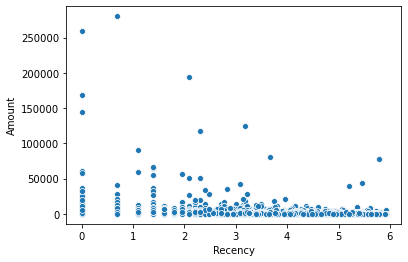

In [58]:
sns.scatterplot(y=df_RFM['Amount'], x=df_RFM['Recency'])

In [59]:
df_RFM[['Recency','Amount','Frequency','Monetary']].corr()

Recency    Amount  Frequency  Monetary
Recency    1.000000 -0.205112  -0.485553 -0.484054
Amount    -0.205112  1.000000   0.243692  0.442405
Frequency -0.485553  0.243692   1.000000  0.756749
Monetary  -0.484054  0.442405   0.756749  1.000000

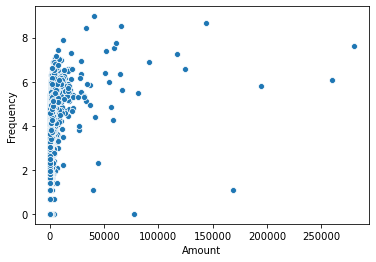

In [60]:
sns.scatterplot(x=df_RFM['Amount'], y=df_RFM['Frequency'])

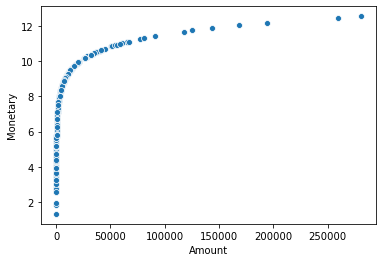

In [61]:
sns.scatterplot(x=df_RFM['Amount'], y=df_RFM['Monetary'])

In [62]:
# 5 Create a 3D plot of RFM by running this (make sure to name your variables accordingly):

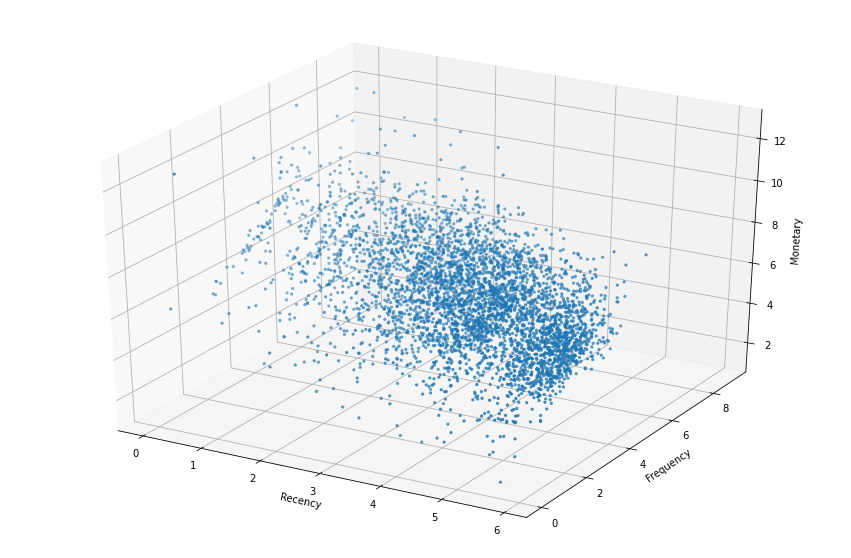

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

r = df_RFM.Recency
f = df_RFM.Frequency
m = df_RFM.Monetary
ax.scatter(r, f, m, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

6. Write down your observations.
7. Prepare the data for clustering by running this (make sure to name your variables accordingly):

In [64]:
# 6 weak corr between freq and amt; rece and amt (nega corr)
# some sort of clustering around the right side of the graph

In [65]:
# 7Prepare the data for clustering by running this (make sure to name your variables accordingly):

In [66]:
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

feature_vector = ['Recency','Frequency', 'Monetary']
X_subset = df_RFM[feature_vector]
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

In [67]:
X_scaled

array([[ 1.40989446, -2.77515957,  3.69871931],
       [-2.14649825,  1.1495495 ,  1.410201  ],
       [ 0.38397128, -0.18534723,  0.71641884],
       ...,
       [-1.17860486, -0.90111592, -1.11736527],
       [-1.66255156,  2.22351465,  0.83796882],
       [-0.00442205,  0.42893082,  0.73389579]])

8. Try out 2 <= k <= 20. 
9. Validate what the best k with elbow method, silhouette score, and Davies-Bouldin index.
10. Write down your observations.
11. If it is hard to decide for the best number of k, undo the log scaling and try clustering again.
12. Determine what makes sense in the clustering, and decide what the best k is.
13. To help you further, create a boxplot of clusters for each k for every RFM measure. The less the variance (or thickness of boxplot) the better.
14. Also, explore on adding other freatures per customer such as Country, how long the customer has been a customer, etc.

In [68]:
# 8 Try out 2 <= k <= 20.

In [69]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [70]:
sse,db,slc = {}, {}, {}
for k in range(2, 20):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_scaled) #random_state impt to reproduce results
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X_scaled,clusters)
    slc[k] = silhouette_score(X_scaled,clusters)
    

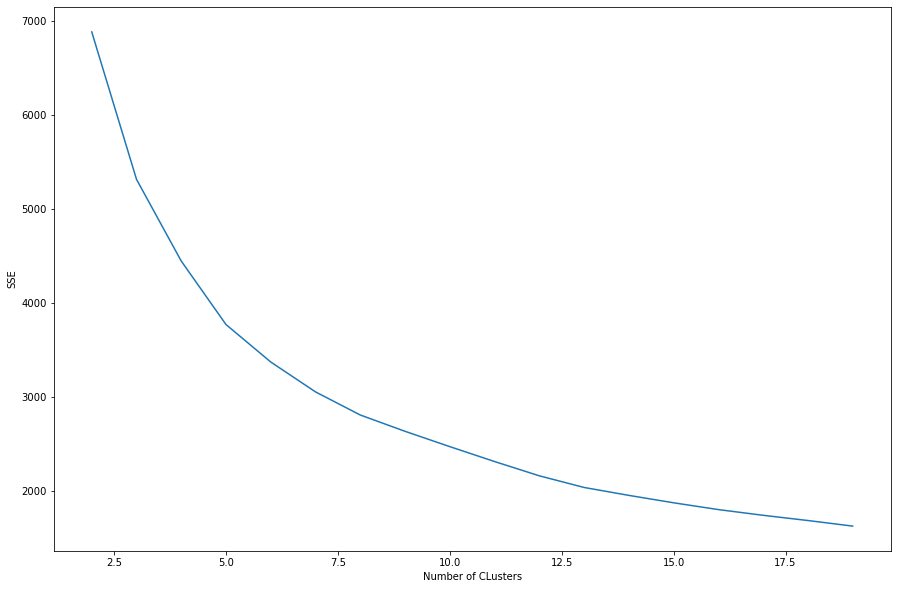

In [71]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of CLusters')
plt.ylabel('SSE')
plt.show()

In [72]:
from kneed import *
k1 = KneeLocator(range(2,20), list(sse.values()), curve='convex', direction='decreasing')
k1.elbow

7

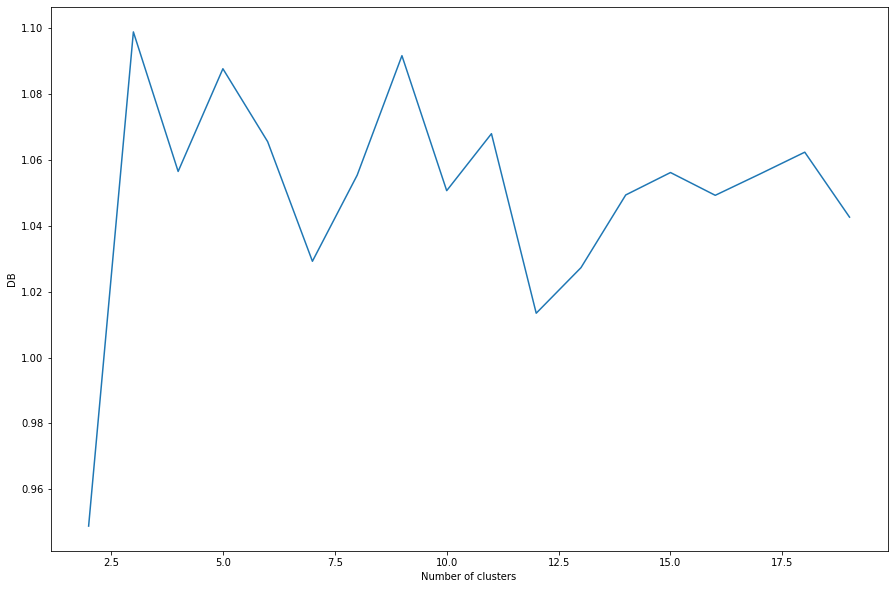

In [73]:
# davies bouldin

plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel('Number of clusters')
plt.ylabel('DB')
plt.show()

In [74]:
#Minimum value means it is the best cluster
print(list(db.keys())[list(db.values()).index(min(db.values()))])

2


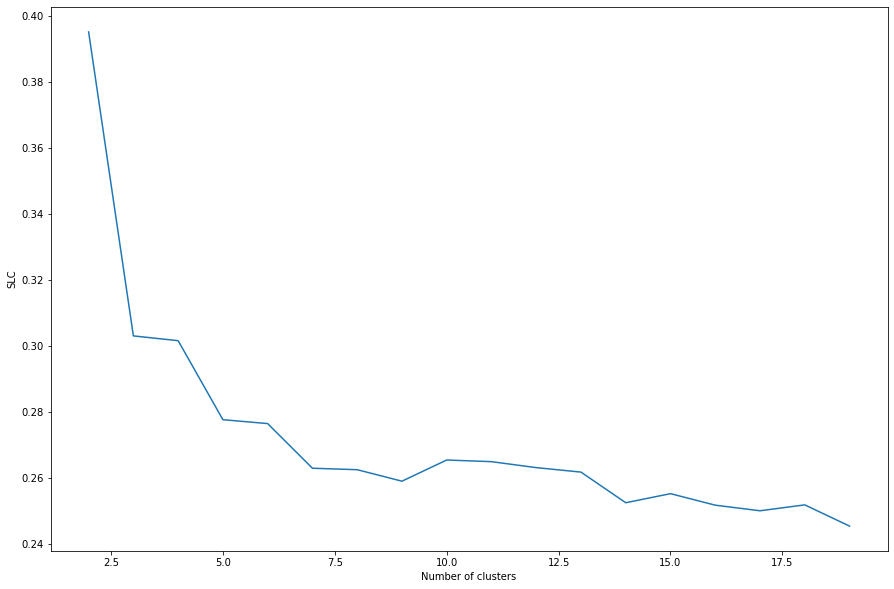

In [75]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SLC')
plt.show()

In [76]:
X=X_scaled

For n_clusters = 2 The average silhouette_score is : 0.39514832005390826
For n_clusters = 3 The average silhouette_score is : 0.30311493970044673
For n_clusters = 4 The average silhouette_score is : 0.30166794750623444
For n_clusters = 5 The average silhouette_score is : 0.2777470197554517
For n_clusters = 6 The average silhouette_score is : 0.27656817441488457
For n_clusters = 7 The average silhouette_score is : 0.26305188714310146
For n_clusters = 8 The average silhouette_score is : 0.2626096947538919
For n_clusters = 9 The average silhouette_score is : 0.25913046857473365
For n_clusters = 10 The average silhouette_score is : 0.2655411235831407
For n_clusters = 11 The average silhouette_score is : 0.2650401219607725
For n_clusters = 12 The average silhouette_score is : 0.26323461929232855
For n_clusters = 13 The average silhouette_score is : 0.26187811901141944
For n_clusters = 14 The average silhouette_score is : 0.2526060693814466
For n_clusters = 15 The average silhouette_score is

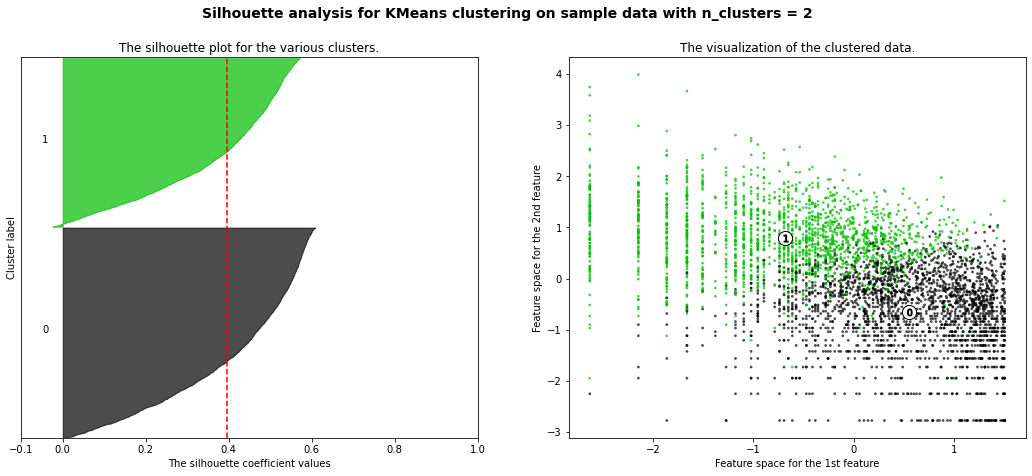

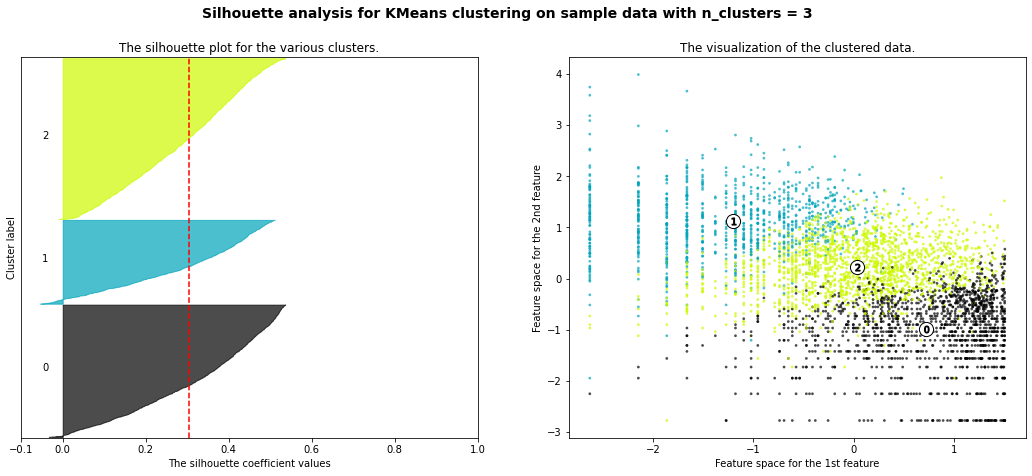

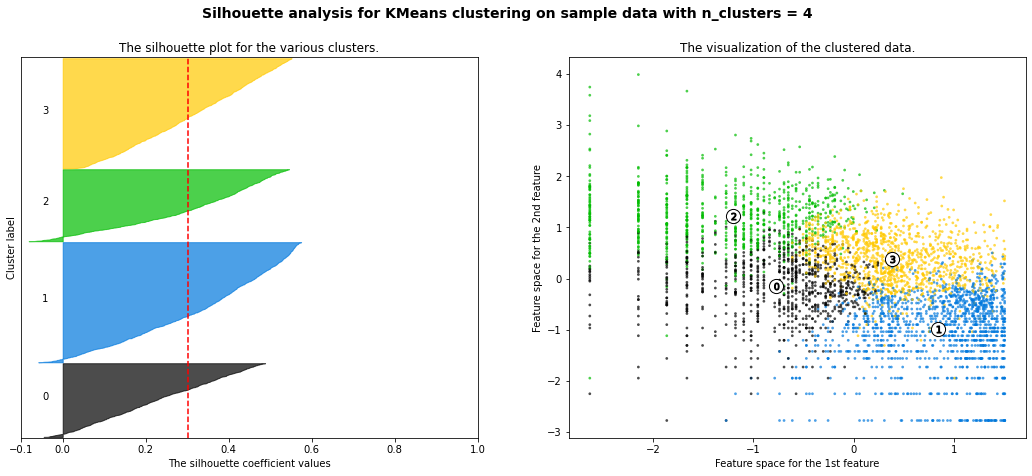

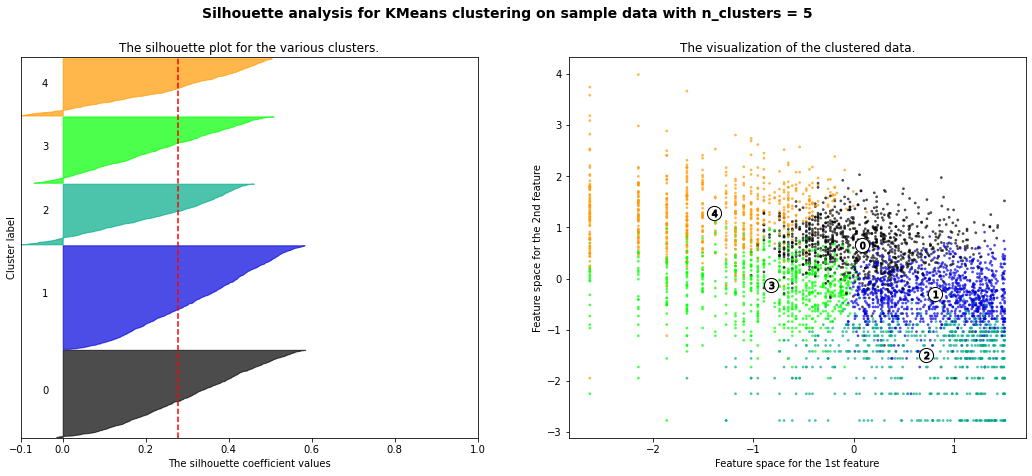

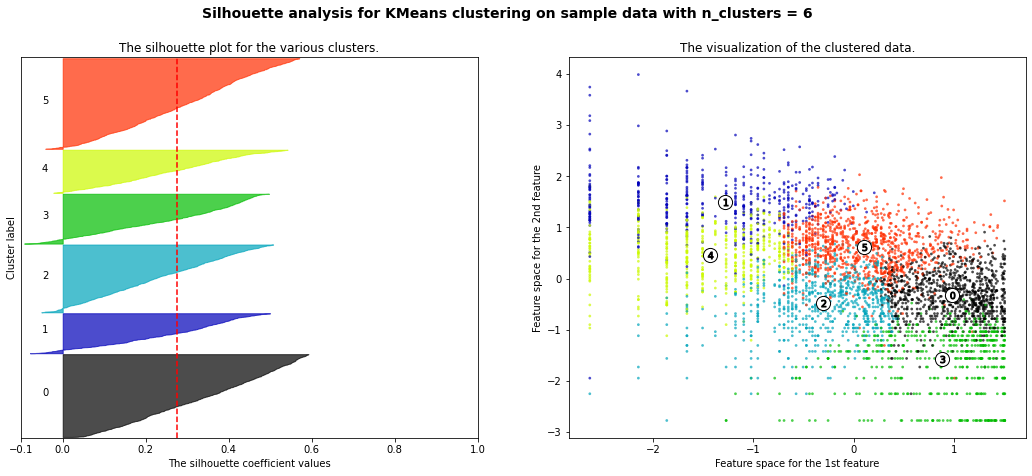

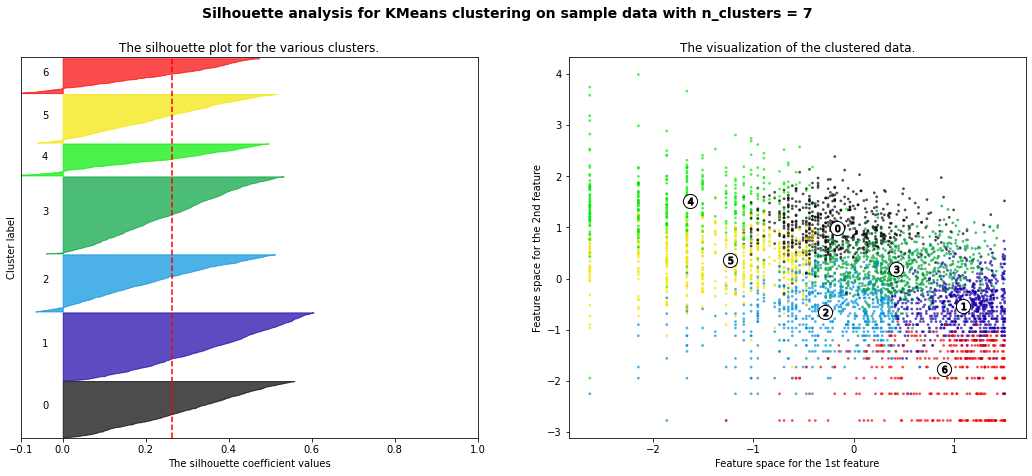

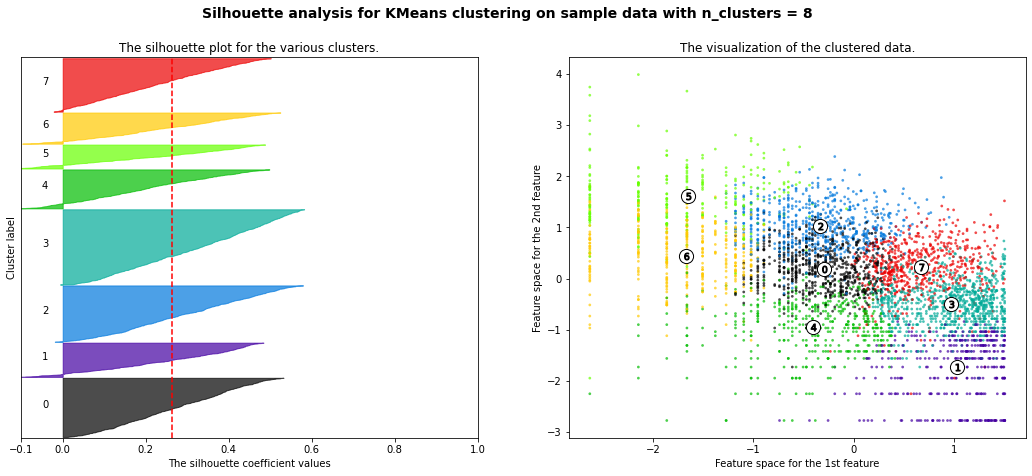

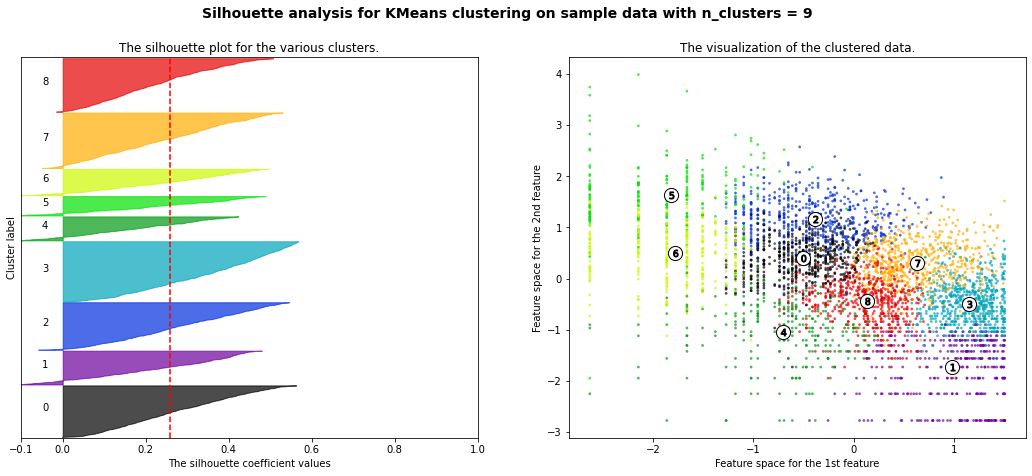

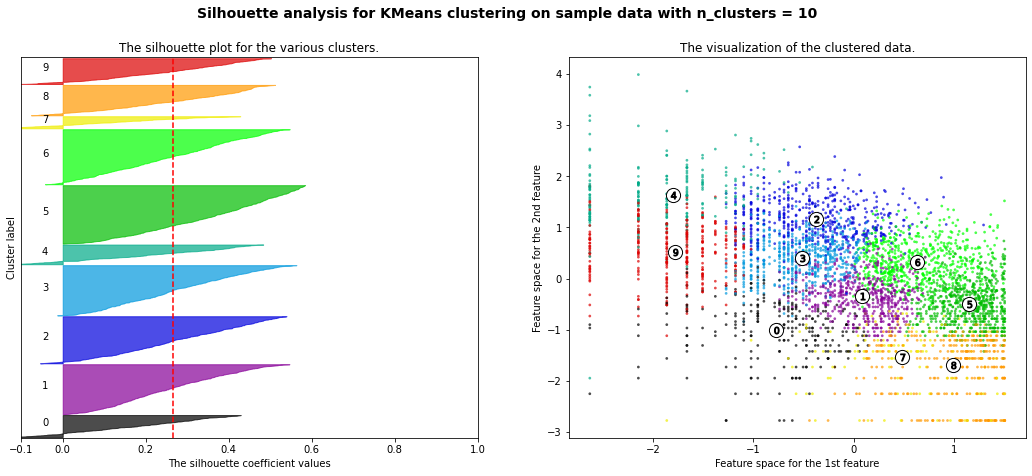

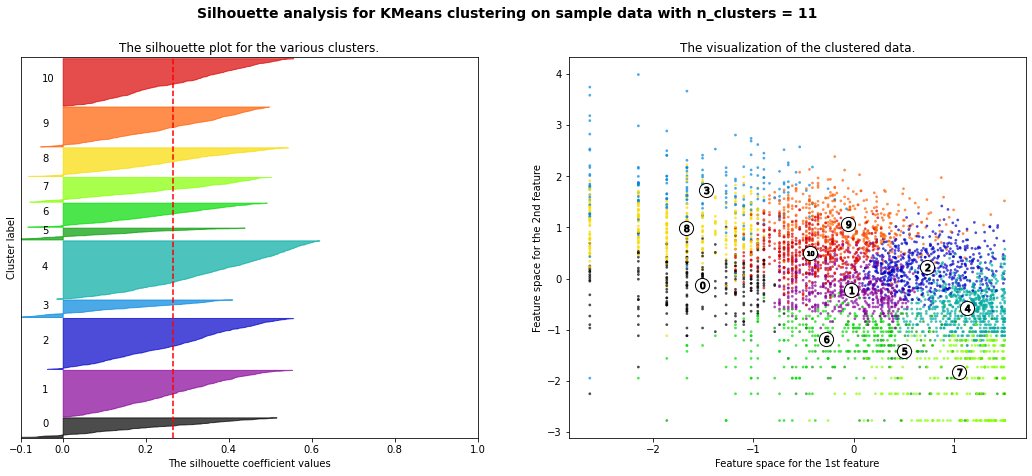

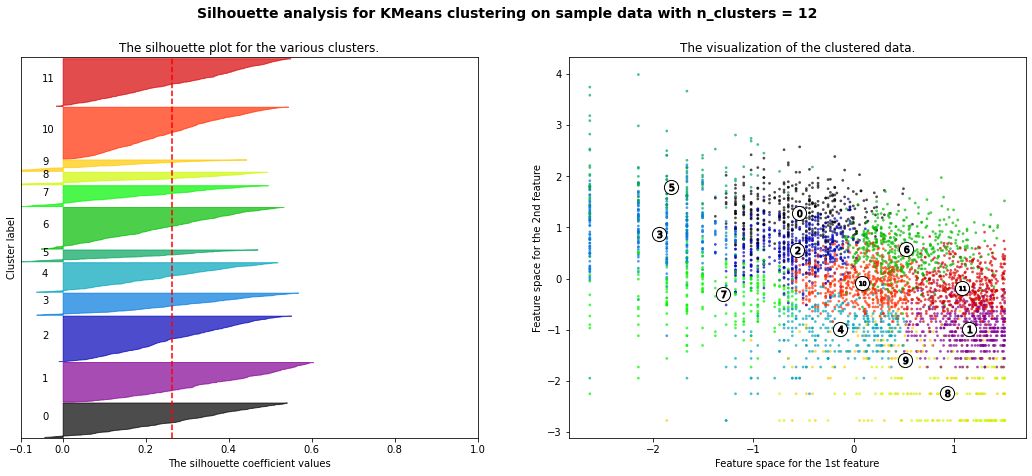

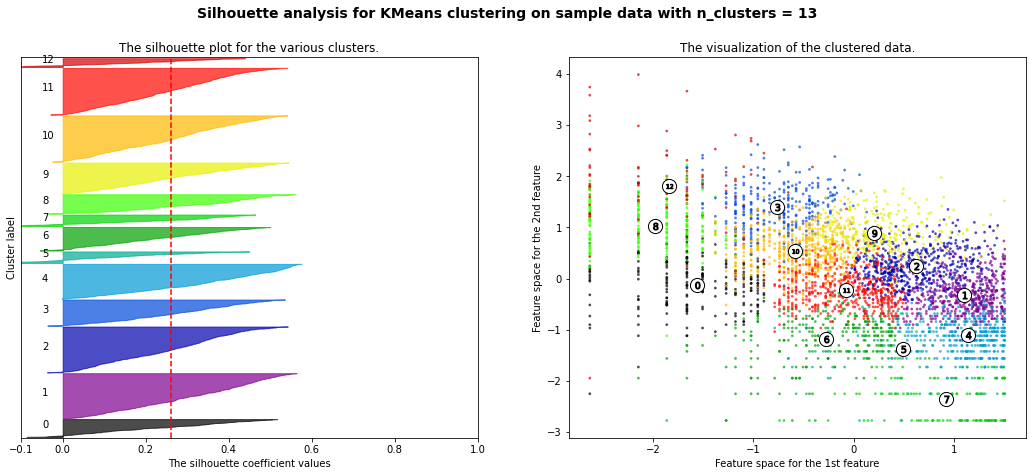

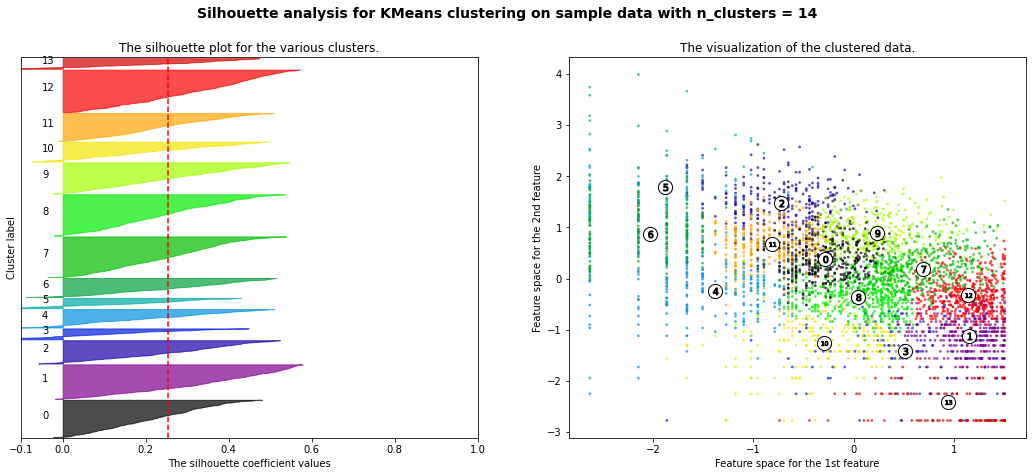

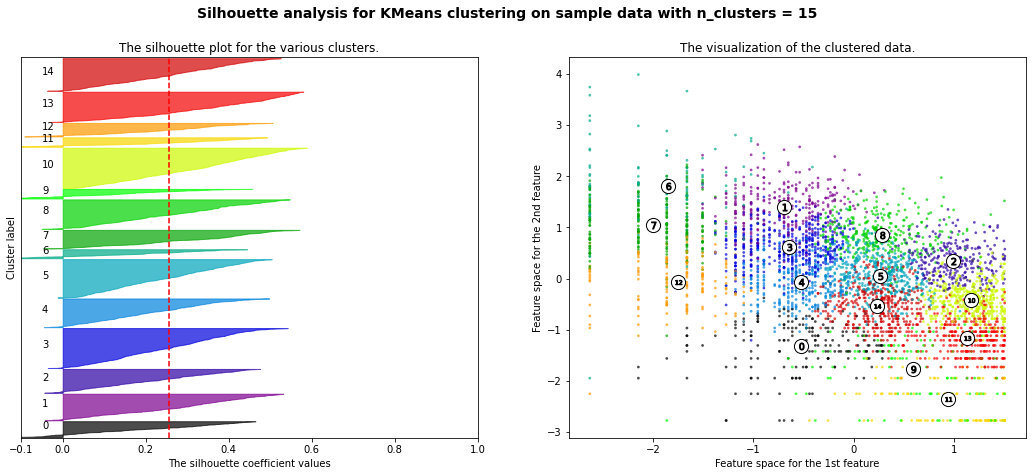

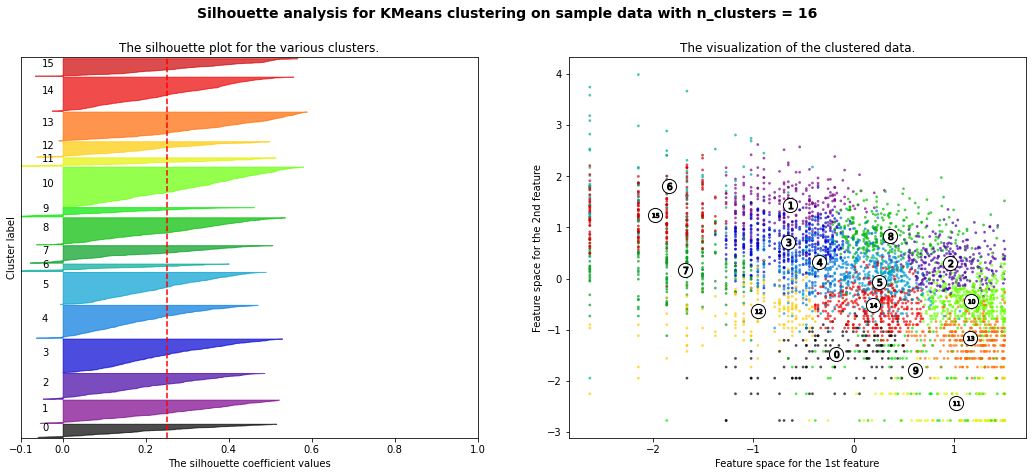

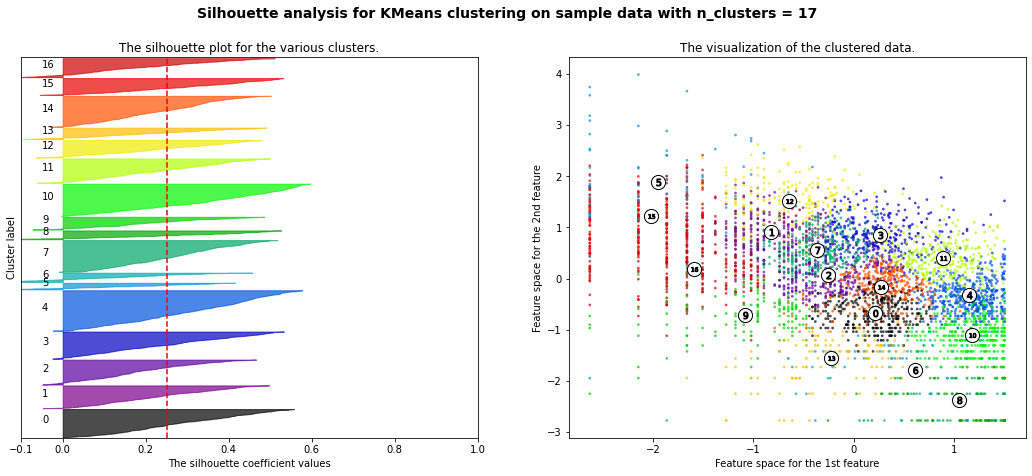

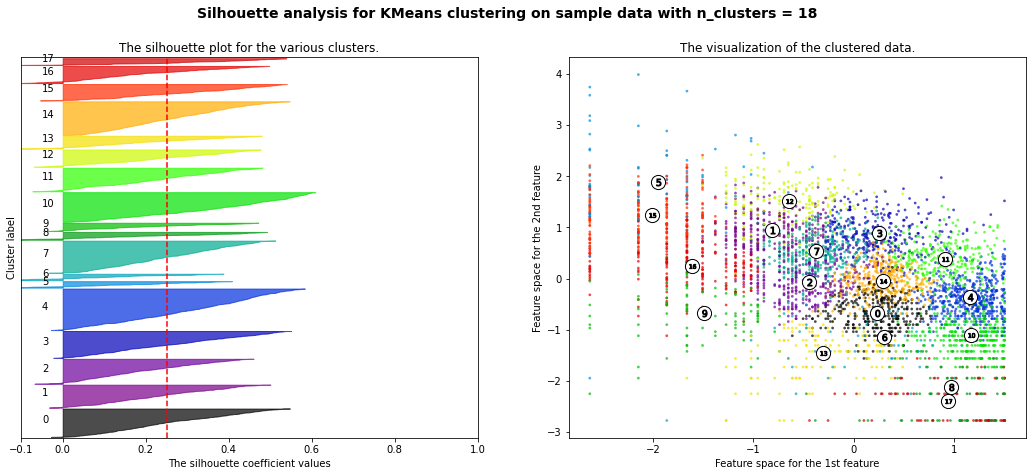

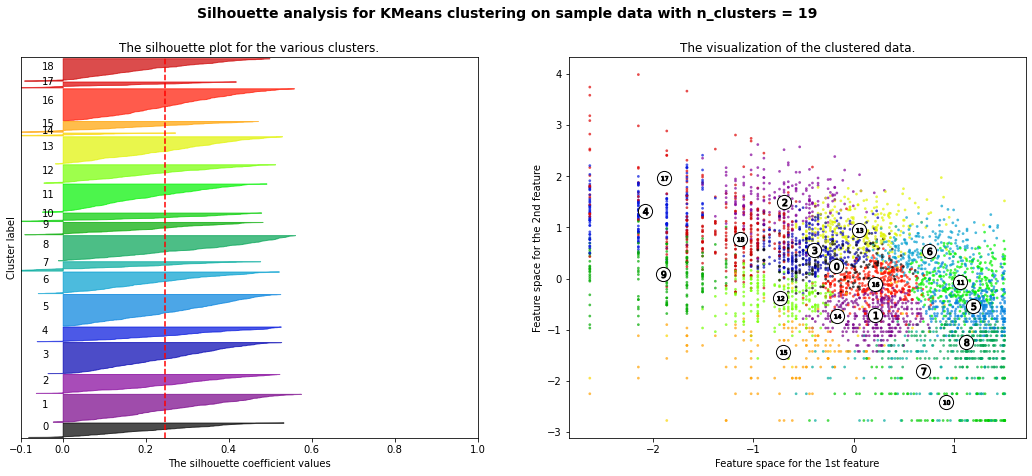

In [77]:
for n_clusters in range(2, 20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [78]:
# 9 elbow and davies have different outputs (elbow = 7, davies = 2, silhouette = 2)

In [79]:
# 10 Write down your observations.
# 11If it is hard to decide for the best number of k, undo the log scaling and try clustering again.
#12 Determine what makes sense in the clustering, and decide what the best k is.
#13 To help you further, create a boxplot of clusters for each k for every RFM measure. The less the variance (or thickness of boxplot) the better.
#14 Also, explore on adding other freatures per customer such as Country, how long the customer has been a customer, etc.

In [80]:
#13
kmeans_2 = KMeans(n_clusters=2, max_iter=1000,random_state=10).fit(X_scaled)

In [81]:
k7 = KMeans(n_clusters=7, max_iter=1000,random_state=10).fit(X_scaled)

In [82]:
kmeans.transform(X_scaled)

array([[5.61093322, 5.09841512, 5.21612984, ..., 4.65887696, 5.84290873,
        5.26399057],
       [3.05877354, 3.7369462 , 1.4985314 , ..., 2.98942199, 1.62926584,
        1.26945685],
       [1.63079395, 1.62666931, 2.18177437, ..., 0.67509066, 3.75683087,
        1.79079102],
       ...,
       [1.57073024, 1.43129457, 3.6432911 , ..., 1.98689887, 4.90289369,
        2.50589961],
       [2.93583906, 3.85707768, 1.41547218, ..., 3.09059862, 1.99048702,
        1.55116079],
       [1.50541889, 1.93594627, 1.53192218, ..., 0.88425424, 3.18826409,
        1.17688805]])

In [83]:
df_RFM['k2'] = kmeans_2.labels_

In [84]:
df_RFM['k7'] = k7.labels_

In [85]:
df_RFM

Recency  Frequency   Monetary    Amount  k2  k7
CustomerID                                                  
12346       5.786897   0.000000  11.253942  77183.60   0   3
12347       0.693147   5.204007   8.368693   4310.00   1   4
12348       4.317488   3.433987   7.494007   1797.24   0   3
12349       2.944439   4.290459   7.471676   1757.55   1   0
12350       5.736572   2.833213   5.812338    334.40   0   1
...              ...        ...        ...       ...  ..  ..
18280       5.627621   2.302585   5.196285    180.60   0   1
18281       5.198497   1.945910   4.392224     80.82   0   6
18282       2.079442   2.484907   5.182064    178.05   0   2
18283       1.386294   6.628041   7.647252   2094.88   1   4
18287       3.761200   4.248495   7.516041   1837.28   1   0

[4338 rows x 6 columns]

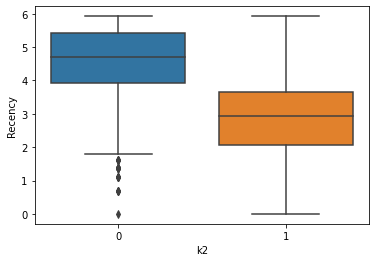

In [86]:
sns.boxplot(x='k2', y ='Recency', data = df_RFM)

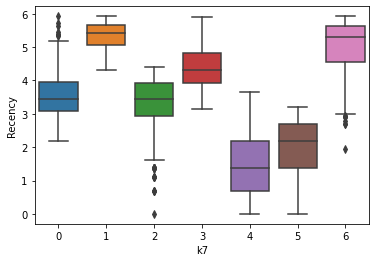

In [87]:
sns.boxplot(x='k7', y ='Recency', data = df_RFM)

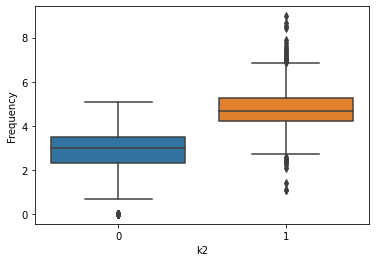

In [88]:
sns.boxplot(x='k2', y ='Frequency', data = df_RFM)

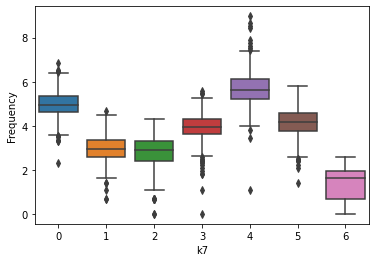

In [89]:
sns.boxplot(x='k7',y ='Frequency', data = df_RFM)

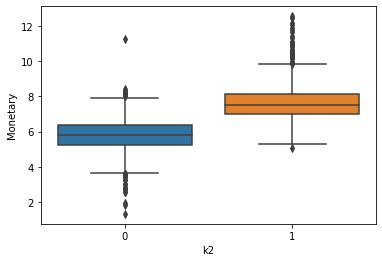

In [90]:
sns.boxplot(x='k2', y ='Monetary', data = df_RFM)

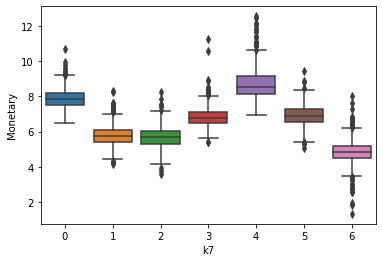

In [91]:
sns.boxplot(x='k7', y ='Monetary', data = df_RFM)

### Supplementing with Market Basket Analysis

1. Run this code to generate an encoded item listing:

In [95]:
new_df = df

In [96]:
items = list(new_df.Description.unique())
grouped = new_df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

2. What can you say about the `transaction_df` DataFrame?
3. Transpose the DataFrame and get only the 20 most products bought on 100 first transactions.
4. Implement the Apriori and FP Growth Algorithms.
5. Write down your observations.

In [94]:
#2 What can you say about the transaction_df DataFrame?
transaction_df

In [ ]:
transaction_df.T